In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize as fit
import datetime 
import numpy as np

In [3]:
#1a
tbl = pd.read_csv("Downloads/GlobalLandTemperaturesByState.csv")
filtered = tbl.loc[(tbl["dt"] > "2000") & (tbl["State"].isin(["Wyoming", "Nebraska", "South Dakota"])), ["dt", "AverageTemperature", "State"]]
filtered

,dt,AverageTemperature,State
350761,2000-01-01,-2.024,Nebraska
350762,2000-02-01,1.719,Nebraska
350763,2000-03-01,5.687,Nebraska
350764,2000-04-01,9.417,Nebraska
350765,2000-05-01,16.827,Nebraska
...,...,...,...
626435,2013-05-01,10.607,Wyoming
626436,2013-06-01,16.267,Wyoming
626437,2013-07-01,20.222,Wyoming
626438,2013-08-01,19.621,Wyoming


In [38]:
#1b
grouped = filtered.groupby("dt")["AverageTemperature"].mean().reset_index()
grouped

,dt,AverageTemperature
0,2000-01-01,-4.072000
1,2000-02-01,-0.205000
2,2000-03-01,3.642667
3,2000-04-01,7.609667
4,2000-05-01,14.255000
...,...,...
160,2013-05-01,13.196000
161,2013-06-01,18.783667
162,2013-07-01,22.110333
163,2013-08-01,21.890000


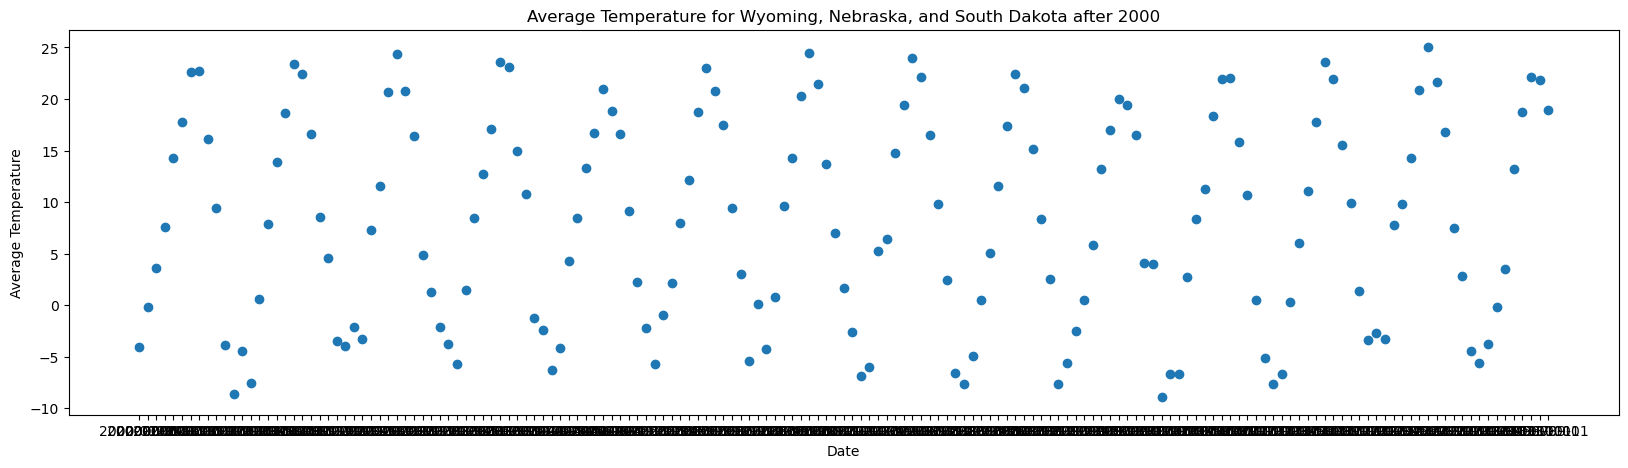

In [39]:
#1c
plt.figure(figsize = (20,5))
plt.scatter(grouped["dt"], grouped["AverageTemperature"])
plt.xlabel("Date")
plt.ylabel("Average Temperature")
plt.title("Average Temperature for Wyoming, Nebraska, and South Dakota after 2000")
plt.show()

In [67]:
#1d
grouped['dt'] = pd.to_datetime(grouped['dt'])
def integer(dt):
    return dt.year + dt.month/12 + dt.day/365
grouped['Date'] = grouped['dt'].apply(integer)
grouped

,dt,AverageTemperature,Date
0,2000-01-01,-4.072000,2000.086073
1,2000-02-01,-0.205000,2000.169406
2,2000-03-01,3.642667,2000.252740
3,2000-04-01,7.609667,2000.336073
4,2000-05-01,14.255000,2000.419406
...,...,...,...
160,2013-05-01,13.196000,2013.419406
161,2013-06-01,18.783667,2013.502740
162,2013-07-01,22.110333,2013.586073
163,2013-08-01,21.890000,2013.669406


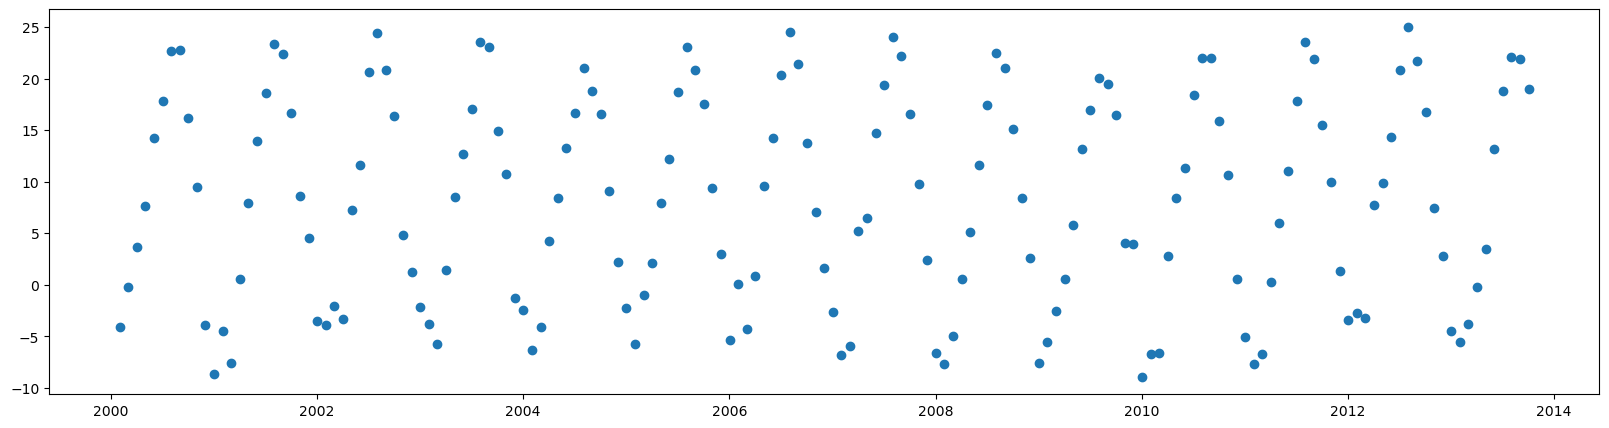

In [69]:
plt.figure(figsize = (20, 5))
plt.scatter(grouped["Date"], grouped["AverageTemperature"])
plt.show()

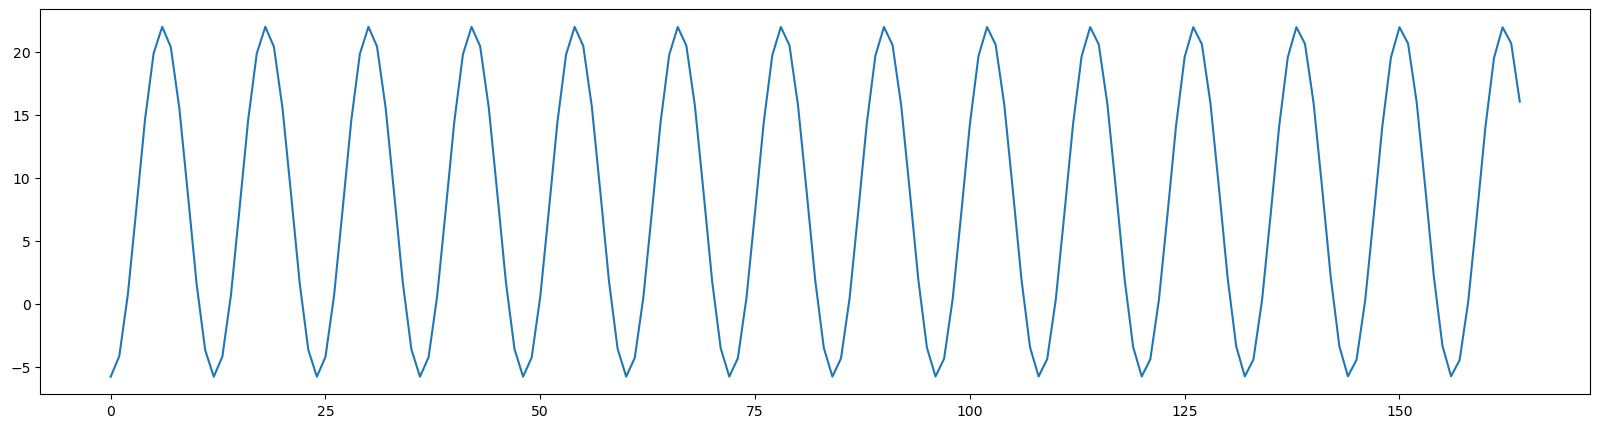

In [71]:
#1e and f
def sine(x,a,b,c,d):
    return a*np.sin((2*np.pi/b)*x + c) + d
guess = [14, 1, 0, 7]
par, cov = fit.curve_fit(sine, grouped["Date"], grouped["AverageTemperature"], guess)
plt.figure(figsize = (20, 5))
plt.plot(sine(grouped["Date"], par[0], par[1], par[2], par[3]))
plt.show()

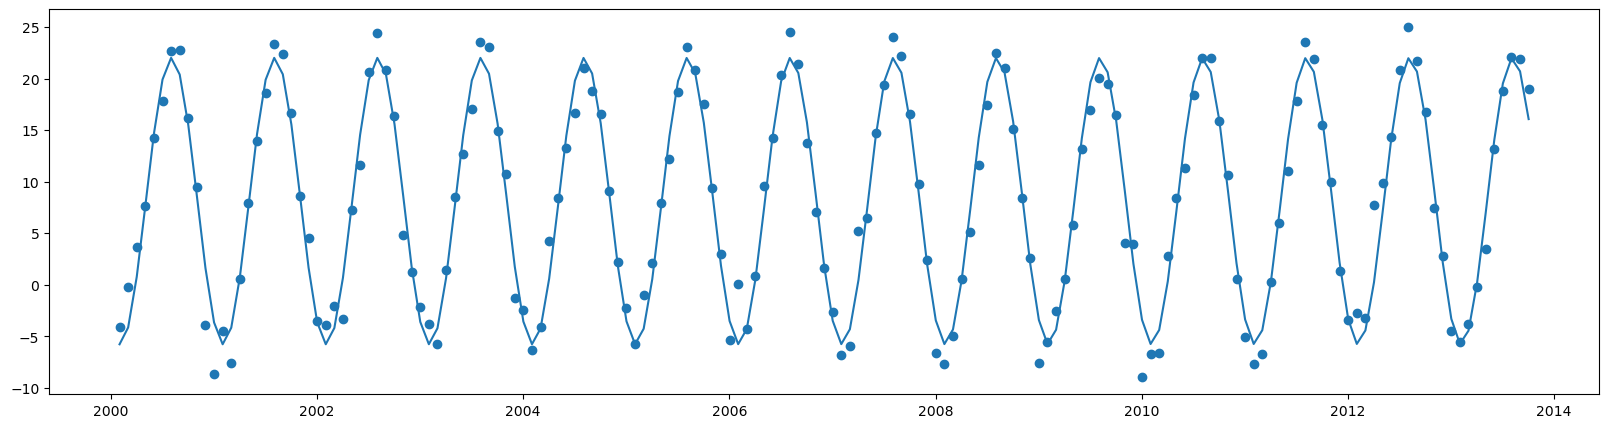

In [74]:
#1g
plt.figure(figsize = (20,5))
plt.scatter(grouped["Date"], grouped["AverageTemperature"])
plt.plot(grouped["Date"],sine(grouped["Date"], par[0], par[1], par[2], par[3]))
plt.show()

In [87]:
#1h
error = np.sqrt([cov[0][0], cov[1][1], cov[2][2], cov[3][3]])
print("Amplitude:", par[0], "+-", error[0], "\nPeriod:", par[1], "+-", error[1], "\nPhase shift:", par[2], "+-", error[2], "\nVertical shift:", par[3], "+-", error[3])

Amplitude: -13.89958988973754 +- 0.22636176459599172 
Period: 1.0006070445401838 +- 0.0006626811162699421 
Phase shift: 8.620928894110277 +- 8.346236156838 
Vertical shift: 8.12295064563047 +- 0.1605058942258321


In [10]:
#2
one = np.random.randint(0, 200, size= 50)
two = np.random.randint(0, 200, size= 50)
three = np.random.randint(0, 200, size= 50)

Text(0.5, 1.0, 'List 3 Random Data')

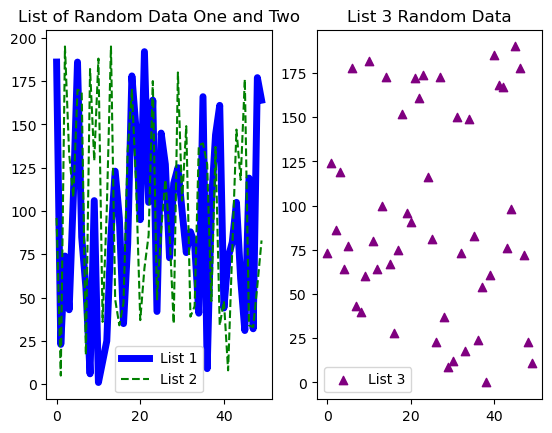

In [26]:
f, (ax1, ax2) = plt.subplots(1,2)
ax1.plot(one, color = "blue", linewidth = 5, label = "List 1")
ax1.plot(two, color = "green", ls = "--", label = "List 2")
ax1.legend()
ax2.scatter(np.arange(50), three, marker = "^", color = "purple", label = "List 3")
ax2.legend()
ax1.set_title("List of Random Data One and Two")
ax2.set_title("List 3 Random Data")

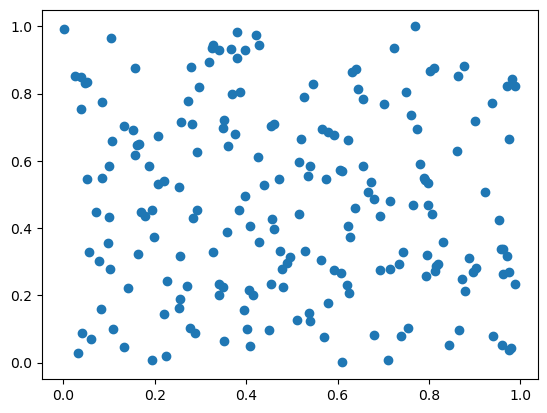

In [2]:
#3
x= np.random.random(size = 200)
y = np.random.random(size=200)
plt.figure()
plt.scatter(x,y)
plt.show()

In [14]:
one = {}
outside = {}
for i in np.arange(200):
    if x[i]**2 + y[i]**2 <= 1:
        one.update({x[i]:y[i]})
    else:
        outside.update({x[i]:y[i]})


In [17]:
x10 = np.random.random(10)
y10 = np.random.random(10)
one10 = {}
outside10 = {}
for i in np.arange(10):
    if x10[i]**2 + y10[i]**2 <= 1:
      one10.update({x10[i]:y10[i]})
    else:
         outside10.update({x10[i]:y10[i]})
ratio = len(one10) / 10*4
ratio

2.8

In [19]:
x103 = np.random.random(1000)
y103 = np.random.random(1000)
one103 = {}
outside103 = {}
for i in np.arange(1000):
    if x103[i]**2 + y103[i]**2 <= 1:
        one103.update({x103[i]:y103[i]})
    else:
         outside103.update({x103[i]:y103[i]})
ratio2 = len(one103) / 1000*4
ratio2

3.132

In [20]:
x105 = np.random.random(100000)
y105 = np.random.random(100000)
one105 = {}
outside105 = {}
for i in np.arange(100000):
    if x105[i]**2 + y105[i]**2 <= 1:
        one105.update({x105[i]:y105[i]})
    else:
        outside105.update({x105[i]:y105[i]})

ratio3 = len(one105) / 100000*4
ratio3

3.15064

In [ ]:
x106 = np.random.random(1000000)
y106 = np.random.random(1000000)
one106 = {}
outside106 = {}
for i in np.arange(1000000):
    if x106[i]**2 + y106[i]**2 <= 1:
        one106.update({x106[i]:y106[i]})
    else:
        outside106.update({x106[i]:y106[i]})

ratio5 = len(one106) / 1000000*4
ratio5

In [3]:
x104 = np.random.random(10000)
y104 = np.random.random(10000)
one104 = {}
outside104 = {}
for i in np.arange(10000):
    if x104[i]**2 + y104[i]**2 <= 1:
        one104.update({x104[i]:y104[i]})
    else:
        outside104.update({x104[i]:y104[i]})
ratio4 = len(one104) / 10000*4
ratio4

3.1752

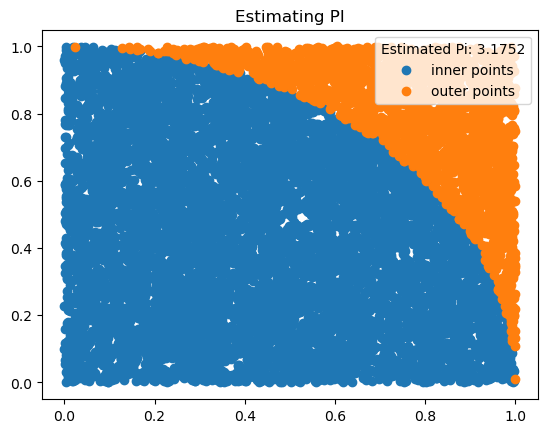

In [9]:
plt.figure()
plt.scatter(list(one104.keys()), list(one104.values()), label = "inner points")
plt.scatter(list(outside104.keys()), list(outside104.values()), label = "outer points")
plt.legend()
plt.title("Estimating PI")
plt.legend(title=f"Estimated Pi: {ratio4:.4f}")
plt.show()